In [ ]:
# !pip install youtube_dl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Statistics

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Data Mining Project Music Video/Data/music_video_features.csv')

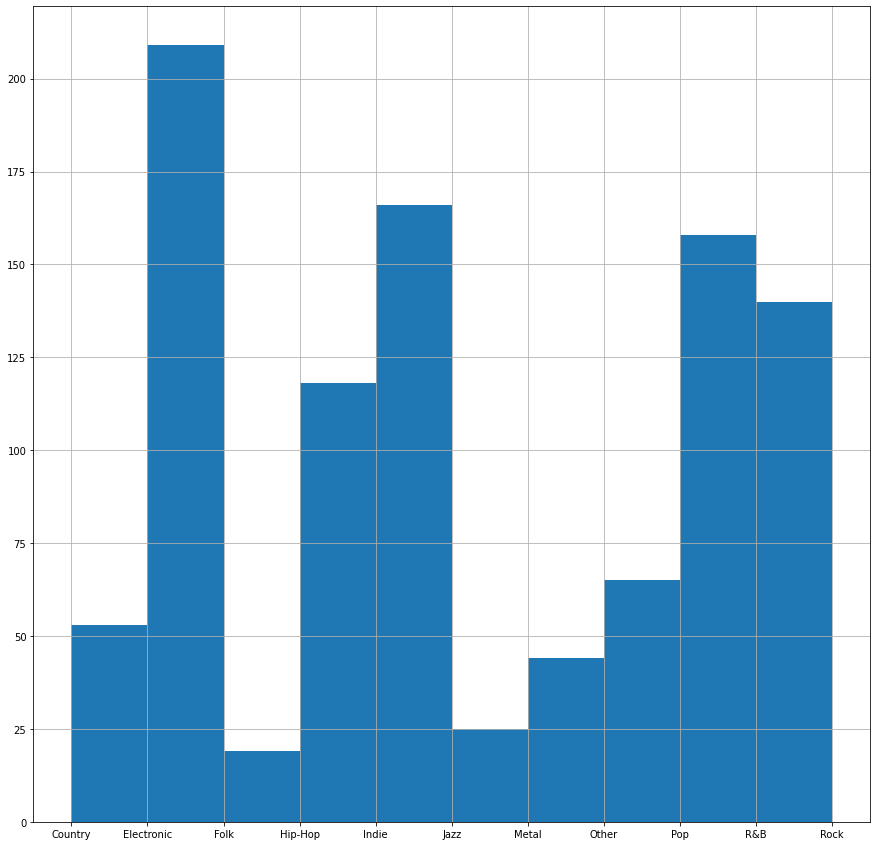

In [ ]:
import matplotlib.pyplot as plt


df['genre'].hist(figsize = (15,15))

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Data Mining Project Music Video/music_videos_v2.csv')

In [ ]:
df2

,Unnamed: 0,song_id,song,year,artist,genre,lyrics,video_path
0,0,104799,holy,2016,florida-georgia-line,Country,When the sun had left and the winter came And ...,https://www.youtube.com/watch?v=zXDAYlhdkyg
1,1,96856,temporary-home,2009,carrie-underwood,Country,Little boy six years old A little too used to ...,https://www.youtube.com/watch?v=LraOiHUltak
2,2,200403,pistol,2007,dustin-kensrue,Country,Love how you curse when I wake you up Sweetly ...,https://www.youtube.com/watch?v=72D49j0RcPs
3,3,81046,summer,2016,cassadee-pope,Country,Verse 1 Rolled in as wild and free As a clear ...,https://www.youtube.com/watch?v=4w5K75KPIcQ
4,4,78479,little-moments,2010,brad-paisley,Country,Well I'll never forget the first time that I h...,https://www.youtube.com/watch?v=vBErCVNP6rM
...,...,...,...,...,...,...,...,...
992,95873,160594,spanish-sahara,2010,foals,Rock,So I walked through to the haze And a million ...,https://www.youtube.com/watch?v=eYoINidnLRQ
993,40949,69532,slow-burn,2002,david-bowie,Rock,Here shall we live in this terrible town Where...,https://www.youtube.com/watch?v=23IdK0yZMvE
994,54915,92633,wishful-thinking,1996,duncan-sheik,Rock,Listen to the waves Everything communicates Wi...,https://www.youtube.com/watch?v=lpFOFZ8t1kY
995,30982,52036,pilgrim,1998,eric-clapton,Rock,And how do I choose and where do I draw the li...,https://www.youtube.com/watch?v=8V9tSQuIzbQ


In [ ]:
df2['genre'].value_counts()

Electronic    209
Indie         166
Pop           158
Hip-Hop       118
Rock           85
Other          65
R&B            55
Country        53
Metal          44
Jazz           25
Folk           19
Name: genre, dtype: int64

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Data Mining Project Music Video/Data/music_videos_v2_plusTopic.csv', delimiter=';')

In [22]:
df4 = df.merge(df3, how= 'outer', on='song_id')

In [ ]:
df_clean = df3.drop(df3.columns[[0,1,2]], axis=1)

In [23]:
df4.to_csv('mvfeaturestopics.csv')

Grabbing Scenes

In [ ]:
import cv2
import os
from tqdm import tqdm_notebook

# file path for test
filename = '/content/drive/MyDrive/Data Mining Project Music Video/videos/Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp4'
filename1 = '/content/drive/MyDrive/Data Mining Project Music Video/videos/Robin Thicke Blurred Lines ft TI Pharrell Unrated Version.mp4' # this is our video file
# tail gets just the file
head, tail = os.path.split(filename)


In [ ]:
!pip install scenedetect

In [ ]:
from scenedetect import VideoManager
from scenedetect import SceneManager

from scenedetect.detectors import ContentDetector

def find_scenes(video_path, threshold=30):
    video_manager = VideoManager([video_path])
    scene_manager = SceneManager()
    scene_manager.add_detector(
        ContentDetector(threshold=threshold))
    base_timecode = video_manager.get_base_timecode()
    video_manager.set_downscale_factor()
    video_manager.start()
    scene_manager.detect_scenes(frame_source=video_manager, show_progress=False)    
    return scene_manager.get_scene_list(base_timecode)

In [ ]:
scene_list = find_scenes(filename, threshold=50)

In [ ]:
cap = cv2.VideoCapture(filename)

frames = []
selected_frames = []

for start_time, end_time in scene_list:
    duration = end_time - start_time
    frame = (start_time.get_frames() + int(duration.get_frames() / 2))
    cap.set(cv2.CAP_PROP_POS_FRAMES,frame)
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)
    selected_frames.append(start_time.get_frames())

In [ ]:
len(frames)

14

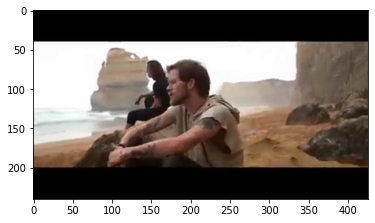

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(frames[3]) # print the 7th scene

Colours

In [ ]:
!pip install colorgram.py
!pip install webcolors

In [ ]:
df_colour = pd.DataFrame(columns=['Movie','Scene','Colour','RGB','Proportion'])

In [ ]:
import colorgram
import webcolors
import io
import urllib

from matplotlib.colors import to_hex
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing import image

%config InlineBackend.figure_format='retina' 

# define function for getting the colour name
def get_colour_name(rgb_triplet):
    """
    From https://stackoverflow.com/questions/9694165/convert-rgb-color-to-english-color-name-like-green-with-python
    """
    min_colours = {}
    for key, name in webcolors.CSS21_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb_triplet[0]) ** 2
        gd = (g_c - rgb_triplet[1]) ** 2
        bd = (b_c - rgb_triplet[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]


In [ ]:
# grabs frames from the selected video
for scenes in range(len(frames)):
  current_frame = frames[scenes]
  img = Image.fromarray(current_frame.astype(np.uint8)) # convert to PIL image object
  colors = colorgram.extract(img, 5) 

  for color in colors:
      rgb = tuple(color.rgb)
      proportion = color.proportion
      hex_code = to_hex([c/255 for c in rgb])
      color_name = get_colour_name(rgb)
      df_colour = df_colour.append({'Movie': tail, 
                      'Scene': scenes, 
                      'Colour': color_name, 
                      'RGB': rgb, 
                      'Proportion': round(proportion, 2)},
                       ignore_index = True)

In [ ]:
#@title
df_colour

,Movie,Scene,Colour,RGB,Proportion
0,Robin Thicke Blurred Lines ft TI Pharrell Unra...,0,silver,"(242, 209, 189)",0.72
1,Robin Thicke Blurred Lines ft TI Pharrell Unra...,0,red,"(225, 51, 58)",0.19
2,Robin Thicke Blurred Lines ft TI Pharrell Unra...,0,silver,"(213, 156, 132)",0.05
3,Robin Thicke Blurred Lines ft TI Pharrell Unra...,0,black,"(20, 3, 2)",0.02
4,Robin Thicke Blurred Lines ft TI Pharrell Unra...,0,black,"(32, 5, 7)",0.01
...,...,...,...,...,...
326,Robin Thicke Blurred Lines ft TI Pharrell Unra...,65,gray,"(199, 149, 128)",0.23
327,Robin Thicke Blurred Lines ft TI Pharrell Unra...,65,black,"(13, 2, 2)",0.16
328,Robin Thicke Blurred Lines ft TI Pharrell Unra...,65,gray,"(141, 84, 71)",0.15
329,Robin Thicke Blurred Lines ft TI Pharrell Unra...,65,black,"(33, 6, 8)",0.08


Face Detection Testing

In [ ]:
faceCascade = cv2.CascadeClassifier('/content/drive/MyDrive/Data Mining Project Music Video/haarcascade_frontalface_default.xml')

In [ ]:
df_facecount = pd.DataFrame(columns=['Movie', 'Scene', 'Faces'])

In [ ]:
for scenes in range(len(frames)):
  current_frame = frames[scenes]
  gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)

  # Detect faces in the image
  faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
    )
  
  df_facecount = df_facecount.append({'Movie': tail,
                              'Scene': scenes,
                              'Faces': len(faces)},
                             ignore_index=True)


In [ ]:
df_facecount

,Movie,Scene,Faces
0,Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp4,0,0
1,Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp4,1,0
2,Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp4,2,0
3,Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp4,3,0
4,Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp4,4,0
5,Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp4,5,0
6,Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp4,6,0
7,Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp4,7,0
8,Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp4,8,0
9,Florida Georgia Line - H.O.L.Y.-zXDAYlhdkyg.mp4,9,0


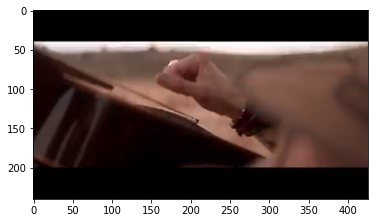

In [ ]:
plt.imshow(frames[0]) # print the chosen scene

DeepFace Testing

In [ ]:
!pip install deepface

In [ ]:
df_faces = pd.DataFrame(columns=['Movie', 'Scene', 'Age', 'Gender', 'Race', 'Emotion'])

In [ ]:
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing import image
from deepface import DeepFace

for scenes in range(len(frames)):
  current_frame = frames[scenes]
  gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)

  # Detect faces in the image
  faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
    )
  
  obj = DeepFace.analyze(img_path = current_frame, actions = ['age', 'gender', 'race', 'emotion'], enforce_detection=False)
  df_faces = df_faces.append({'Movie': tail,
                              'Scene': scenes,
                              'Faces': len(faces),
                              'Age': obj['age'],
                              'Gender':obj['gender'],
                              'Race':obj['dominant_race'],
                              'Emotion':obj['dominant_emotion']},
                             ignore_index=True)


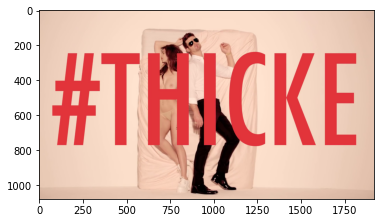

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(frames[0]) # print the chosen scene

In [ ]:
1df_faces

,Movie,Scene,Faces,Age,Gender,Race,Emotion
0,Robin Thicke Blurred Lines ft TI Pharrell Unra...,0,1,38,Man,white,fear
1,Robin Thicke Blurred Lines ft TI Pharrell Unra...,1,1,31,Man,asian,neutral
2,Robin Thicke Blurred Lines ft TI Pharrell Unra...,2,1,35,Man,white,sad
3,Robin Thicke Blurred Lines ft TI Pharrell Unra...,3,1,30,Woman,white,neutral
4,Robin Thicke Blurred Lines ft TI Pharrell Unra...,4,0,26,Woman,white,happy
...,...,...,...,...,...,...,...
62,Robin Thicke Blurred Lines ft TI Pharrell Unra...,62,2,27,Woman,white,fear
63,Robin Thicke Blurred Lines ft TI Pharrell Unra...,63,0,36,Man,white,fear
64,Robin Thicke Blurred Lines ft TI Pharrell Unra...,64,4,33,Man,white,neutral
65,Robin Thicke Blurred Lines ft TI Pharrell Unra...,65,4,30,Woman,white,neutral


Nudenet Test

In [ ]:
!pip install nudenet

In [ ]:
from nudenet import NudeClassifier

classifier = NudeClassifier()

#for scenes in range(len(frames)):
current_frame = frames[scenes]
img = Image.fromarray(current_frame.astype(np.uint8)) # convert to PIL image object

classifier.classify(current_frame)

Features Examination

In [ ]:
df[df['genre'] == 'Other']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,song_id,song,year,artist,genre,lyrics,video_path,path,video_length,scene_count,frame_count,mot_int_mean,mot_int_std,lighting_met,light_mean,sat_met,sat_mean,col_en,colness
634,0,204,204,204,146520,baecation,2016,a-boogie-wit-da-hoodie,Other,I took her on a baecation She fell in love wi...,https://www.youtube.com/watch?v=U8KvGx1qu1s,vids/A Boogie Wit Da Hoodie - Baecation [Offic...,238,25,7146,0.118976,0.084020,0.0,116.508090,0.0,49.564502,129.125200,24.414016
635,1,205,205,205,215258,restless-year,2015,ezra-furman,Other,Ooh la ooohhh Sing like a Ooh la ooohhh I set ...,https://www.youtube.com/watch?v=NDOenFQazrA,vids/Ezra Furman - Restless Year [Official Mus...,144,62,2172,0.160661,0.098053,0.0,112.352754,0.0,65.713695,332.934817,29.329689
636,2,206,206,206,60648,fighting-gravity,2014,caleb-johnson,Other,Patiently discovering you All the things you e...,https://www.youtube.com/watch?v=kxDyjZ1aFEI,vids/Caleb Johnson - Fighting Gravity.mp4,249,102,5992,0.105879,0.102152,0.0,44.859226,0.0,79.686970,NaN,10.757137
637,3,207,207,207,181591,shake-that,2014,dansson-marlon-hoffstadt,Other,Shake that baby drivin me crazy Shake that bab...,https://www.youtube.com/watch?v=gPmBYWlirIE,vids/Dansson & Marlon Hoffstadt - Shake That (...,175,80,4382,0.166850,0.179365,0.0,93.861731,0.0,101.568345,NaN,31.788047
638,4,208,208,208,33248,too-cool-to-dance,2014,eden-xo,Other,You know I'm always looking fly Never wear the...,https://www.youtube.com/watch?v=nAuY9TWichM,vids/Eden xo - Too Cool To Dance.mp4,196,136,4706,0.168993,0.079846,0.0,108.119139,0.0,78.525834,NaN,37.962701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,60,779,779,111031,185993,lonesome-broken-and-blue,2016,adam-wakefield,Other,Loving you is like staring in the sun The more...,https://www.youtube.com/watch?v=S8Zc6_jENr8,vids/The Voice 2016 Adam Wakefield Finale ...,215,2,6467,0.057206,0.060671,0.0,64.347188,0.0,140.833715,466.370681,45.971014
695,61,780,780,111174,186232,charlemagne,2016,blossoms,Other,Hello hello You put love in my hand I know I k...,https://www.youtube.com/watch?v=WBtVjjLtEY8,vids/Blossoms - Charlemagne.mp4,171,26,4293,0.092303,0.048948,0.0,35.665090,0.0,30.701927,NaN,14.184351
696,62,781,781,115085,192870,fire-in-my-bones,2015,fleurie,Other,Fire in my bones quakes bending but it won't ...,https://www.youtube.com/watch?v=A3oLx3YGKUk,vids/Fleurie - Fire In My Bones (Official Vide...,232,83,5590,0.151454,0.132580,0.0,97.343570,0.0,27.899049,NaN,14.705711
697,63,782,782,125604,210535,lucky-squirrels,2016,the-giggle-gems,Other,Call it magic One and one is two but two ain't...,https://www.youtube.com/watch?v=N4SkI2zoD6A,vids/The Giggle Gems - Lucky Squirrels [EXPLIC...,192,40,4614,0.084382,0.085188,0.0,111.634049,0.0,89.728734,473.969840,32.937963


In [ ]:
df.groupby('genre').mean()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,song_id,year,video_length,scene_count,frame_count,mot_int_mean,mot_int_std,lighting_met,light_mean,sat_met,sat_mean,col_en,colness
genre,,,,,,,,,,,,,,,,,
Country,26.0,240.320755,240.320755,45654.849057,109181.943396,2008.698113,235.037736,100.660377,6326.264151,0.145979,0.085785,-186450.069314,74.800772,-662705.808168,153.870492,inf,26.625976
Electronic,104.0,310.210526,310.210526,46663.971292,116755.866029,2009.727273,242.827751,86.492823,6164.258373,0.129690,0.082261,-1728.965835,78.057044,-672986.403360,155.287108,inf,30.744660
Folk,9.0,307.842105,307.842105,44985.578947,129563.368421,2012.315789,237.210526,59.736842,5852.105263,0.112208,0.094029,-384568.909134,69.652359,-864043.579720,174.822470,inf,18.371614
Hip-Hop,58.5,417.737288,417.737288,40199.932203,100414.271186,2009.084746,237.957627,107.483051,6174.686441,0.151462,0.085803,-71096.439384,77.340152,-700339.209501,148.646649,inf,31.289278
Indie,82.5,476.246988,476.246988,47908.168675,124367.765060,2012.903614,235.903614,55.740964,5938.439759,0.105258,0.076742,-197633.483130,70.982196,-928783.416171,154.235921,inf,23.573005
Jazz,12.0,650.200000,650.200000,52122.480000,101032.560000,2005.720000,240.360000,54.920000,6292.160000,0.130269,0.079468,69475.740294,79.331800,-918165.180282,152.740864,1142.822318,26.523333
Metal,21.5,541.045455,541.045455,47210.704545,124823.250000,2007.795455,248.977273,126.022727,6170.113636,0.165970,0.101914,-191139.020786,72.842033,-521328.320574,163.426395,inf,24.019885
Other,32.0,481.615385,481.615385,32225.107692,110972.723077,2014.876923,212.338462,81.353846,5248.492308,0.136977,0.086948,0.000000,81.943538,0.000000,74.653928,328.619287,28.992928
Pop,78.5,690.455696,690.455696,42374.727848,96055.462025,2006.341772,237.848101,97.740506,6100.892405,0.151058,0.089090,0.000000,74.407618,0.000000,82.628191,inf,29.232993


In [ ]:
df_clean = df.drop(df.columns[[0,1,2,3,4,5,6]], axis=1)


In [ ]:
df_clean.groupby('genre').mean()

,video_length,scene_count,frame_count,mot_int_mean,mot_int_std,lighting_met,light_mean,sat_met,sat_mean,col_en,colness
genre,,,,,,,,,,,
Country,235.037736,100.660377,6326.264151,0.145979,0.085785,-186450.069314,74.800772,-662705.808168,153.870492,inf,26.625976
Electronic,242.827751,86.492823,6164.258373,0.129690,0.082261,-1728.965835,78.057044,-672986.403360,155.287108,inf,30.744660
Folk,237.210526,59.736842,5852.105263,0.112208,0.094029,-384568.909134,69.652359,-864043.579720,174.822470,inf,18.371614
Hip-Hop,237.957627,107.483051,6174.686441,0.151462,0.085803,-71096.439384,77.340152,-700339.209501,148.646649,inf,31.289278
Indie,235.903614,55.740964,5938.439759,0.105258,0.076742,-197633.483130,70.982196,-928783.416171,154.235921,inf,23.573005
Jazz,240.360000,54.920000,6292.160000,0.130269,0.079468,69475.740294,79.331800,-918165.180282,152.740864,1142.822318,26.523333
Metal,248.977273,126.022727,6170.113636,0.165970,0.101914,-191139.020786,72.842033,-521328.320574,163.426395,inf,24.019885
Other,212.338462,81.353846,5248.492308,0.136977,0.086948,0.000000,81.943538,0.000000,74.653928,328.619287,28.992928
Pop,237.848101,97.740506,6100.892405,0.151058,0.089090,0.000000,74.407618,0.000000,82.628191,inf,29.232993


In [ ]:
df_clean['genre'].value_counts()

Electronic    209
Indie         166
Pop           158
Hip-Hop       118
Rock           85
Other          65
R&B            55
Country        53
Metal          44
Jazz           25
Folk           19
Name: genre, dtype: int64

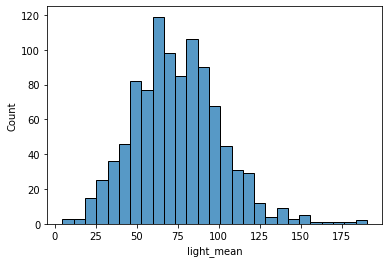

In [ ]:
import seaborn

mean_col = df_clean.groupby('genre')['scene_count'].mean()

seaborn.histplot(x=df_clean['light_mean'])

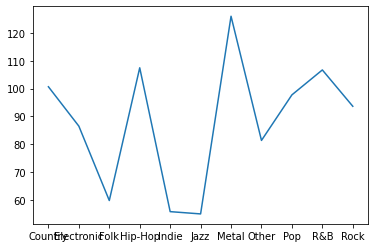

In [ ]:
import matplotlib.pyplot as plt

plt.plot(mean_col)